# WeRateDogs Twitter account data wrangling project

## Table of Contents
><ul>
><li><a href="#intro">Introduction</a></li>
><li><a href="#gathering">Data gathering</a></li>
><li><a href="#assessing">Data assessing</a></li>
><li><a href="#brief">Assessing brief</a></li>
><li><a href="#cleaning">Data cleaning</a></li>
><li><a href="#analysis">Data analysis</a></li>
><li><a href="#conclusions">Conclusions</a></li>
></ul>

<a id='intro'></a>
## Introduction

> The project is related to the WeRateDogs Twitter account data and focuses mainly on the data wrangling part of the overall data analysis process. The data is gathered from a couple of sources (csv files, cloud stored files and pulled directly from the Twitter API), assessed visually and programatically, cleaned with the help of multiple Python libraries and finally merged into a combined dataset. A brief analysis aided by visualizations is provided based on the findings from the final dataset. 



<a id='gathering'></a>
## Data gathering

In [151]:
#Importing all the libraries needed for the project
import pandas as pd
import tweepy as tp
import numpy as np
import requests
import json
import os
import tweepy
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [152]:
#Setting the display options for pandas dataframes to show all text in all rows
pd.set_option('display.max_colwidth',-1)

In [153]:
#Loading the 1st data set in a dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [154]:
#Creating a folder and storing the 2nd data in it set via the requests library
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'    
response = requests.get(url)

with open (os.path.join(folder_name,
                       url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

os.listdir(folder_name)

['image-predictions.tsv']

In [155]:
#Loading the 2nd dataset in a dataframe
df_image = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

In [156]:
#Connecting to Twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [157]:
#Converting the tweet IDs from the 1st data set into an array for future use
tweet_id_list = np.asarray(df_archive.tweet_id)
tweet_id_list

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [158]:
#Creating 2 lists - one for storing the API matched data and one for storing non matching API data compared to the archive dataframe
tweet_list = []
tweet_error_list = []

#Extracting tweets data that matches tweet id data from the archive dataset via the Twitter API
start = time.time()
for tweets in tweet_id_list:
    try:
        tweet = api.get_status(tweets, tweet_mode='extended')._json     
        tweet_list.append(tweet)

#Extracting and printing out the tweet ids of tweets that did not have a match in the archive dataset
    except Exception as e:
        print('Error found with tweet id:' + str(tweets) + " "+ str(e))
        tweet_error_list.append(tweet)

end = time.time()
print(end - start)

Error found with tweet id:888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
Error found with tweet id:873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
Error found with tweet id:872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
Error found with tweet id:872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
Error found with tweet id:869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
Error found with tweet id:866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
Error found with tweet id:861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
Error found with tweet id:856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
Error found with tweet id:851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
Error found with tweet id:845459076796616705 [{'code': 

In [159]:
#Storing Twitter API data in a text file via JSON
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweet_list))

In [160]:
#Storing each tweet data in list
tweet_data = []
for single_tweet in tweet_list:
    tweet_data.append(single_tweet)

In [161]:
#Opening JSON file and storing the data we are interested in in a list
final_data=[]

with open('tweet_json.txt') as json_file:  
    all_data = json.load(json_file)
    for data in all_data:
        tweet_id = data['id']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        final_data.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count)})
        
#Converting list to dataframe
        api_data = pd.DataFrame(final_data)

In [162]:
#Saving API data to a csv file
api_data.to_csv('api_data.csv', index=False)

In [163]:
#Reading API data into a dataframe
df_api = pd.read_csv('api_data.csv')

<a id='assessing'></a>
## Data assesing

### 1st dataset - df_archive assessment 

In [186]:
#Reading the first 50 rows of the archive dataset
df_archive.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [187]:
#Reading the general info regarding the archive dataset
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [188]:
#Checking for tweet ID duplicates
sum(df_archive.tweet_id.duplicated())

0

In [189]:
#Checking all the values attributed to the rating_numerator column
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [190]:
#Assessing all the rows with a rating_numerator higher than 10 
df_numerator = df_archive.query('rating_numerator>15')
df_numerator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [191]:
#Checking all decimal values in the rating_numerator column
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [192]:
#Checking all the values attributed to the rating_denominator column
df_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [193]:
#Assessing all the rows with a rating_denominator higher than 10 
df_denominator = df_archive.query('rating_denominator>10')
df_denominator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a hr

In [194]:
#Assessing a sample of 100 rows of the expnaded_urls column
df_archive.expanded_urls.sample(100)

1726    https://twitter.com/dog_rates/status/680055455951884288/photo/1                                                                                                                                                                                                                                    
170     https://twitter.com/dog_rates/status/859074603037188101/photo/1                                                                                                                                                                                                                                    
713     https://vine.co/v/5ghHLBMMdlV                                                                                                                                                                                                                                                                      
1499    https://twitter.com/dog_rates/status/692187005137076224/photo/1,https://twitter.com/dog_rate

In [195]:
#Assessing all the values attributed to the name column
df_archive.name.value_counts()

None           745
a              55 
Charlie        12 
Cooper         11 
Oliver         11 
Lucy           11 
Penny          10 
Tucker         10 
Lola           10 
Winston        9  
Bo             9  
the            8  
Sadie          8  
Buddy          7  
Daisy          7  
an             7  
Toby           7  
Bailey         7  
Bella          6  
Oscar          6  
Dave           6  
Jack           6  
Scout          6  
Jax            6  
Milo           6  
Leo            6  
Rusty          6  
Koda           6  
Stanley        6  
Chester        5  
              ..  
Roscoe         1  
Newt           1  
Shakespeare    1  
Rueben         1  
Kial           1  
Cilantro       1  
Ike            1  
Zeek           1  
Bodie          1  
Mark           1  
Brockly        1  
Mingus         1  
Ralpher        1  
Iggy           1  
Ole            1  
Augie          1  
Nigel          1  
Tedrick        1  
Staniel        1  
by             1  
Meera          1  
Carll       

In [196]:
#Assessing all the values attributed to the doggo, floofer, pupper and puppo columns
df_archive.doggo.value_counts(), df_archive.floofer.value_counts(), df_archive.pupper.value_counts(), df_archive.puppo.value_counts()

(None     2259
 doggo    97  
 Name: doggo, dtype: int64, None       2346
 floofer    10  
 Name: floofer, dtype: int64, None      2099
 pupper    257 
 Name: pupper, dtype: int64, None     2326
 puppo    30  
 Name: puppo, dtype: int64)

In [197]:
#Assessing all the values attributed to the source column
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

### 2nd dataset - df_image assessment 

In [198]:
#Assessing a number of 15 random rows from the df_image dataset
df_image.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
998,708469915515297792,https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg,1,Chihuahua,0.748163,True,toy_terrier,0.127717,True,Pembroke,0.042141,True
1225,744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True
67,667177989038297088,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True
1810,832769181346996225,https://pbs.twimg.com/media/C46UmzSVMAAqBug.jpg,1,jersey,0.895698,False,sweatshirt,0.089085,False,poncho,0.002975,False
68,667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1,golden_retriever,0.949892,True,Irish_setter,0.010564,True,Chesapeake_Bay_retriever,0.005821,True
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,Italian_greyhound,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True
1097,720340705894408192,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.739170,True,Chesapeake_Bay_retriever,0.246488,True,kelpie,0.006892,True


In [199]:
#Reading the general info regarding the df_image dataset
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [200]:
#Assessing all the values attributed to the p1 column
df_image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
German_shepherd              20 
Siberian_husky               20 
Staffordshire_bullterrier    20 
Cardigan                     19 
web_site                     19 
Maltese_dog                  18 
beagle                       18 
teddy                        18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
Lakeland_terrier             17 
Rottweiler                   17 
Shih-Tzu                     17 
Italian_greyhound            16 
kuvasz                       16 
          

In [201]:
#Checking the dataframe for duplicates
sum(df_image.duplicated())

0

In [202]:
#Assessing the number of tweets where the neural network did not detect a dog in the jpg urls throughout all the true/false columns
df_image.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


### 3rd dataset - df_api assessment 

In [203]:
#Reading the general info regarding the df_api dataset
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [204]:
#Assessing the first 50 rows of the dataset
df_api.head(50)

,favorite_count,retweet_count,tweet_id
0,36507,7764,892420643555336193
1,31466,5754,892177421306343426
2,23701,3808,891815181378084864
3,39836,7931,891689557279858688
4,38041,8558,891327558926688256
5,19145,2858,891087950875897856
6,11148,1869,890971913173991426
7,61556,17338,890729181411237888
8,26361,3944,890609185150312448
9,30149,6753,890240255349198849


<a id='brief'></a>
## Assessing brief

### Quality issues:

#### Overall:

- Incomplete data - different number of total rows in all dataframes: `df_image` (2075), `df_api` (2331), `df_archive` (2356)

#### df_archive:

- `Timestamp` is stored as object 
- There are 181 records of retweeted tweets that should not be in the dataset 
- Some of the `numerator` and `denominator` values are inconsistent, although most of them are within an acceptable range. Most of the values checked visually are the same as in the `text` column. Since the rating system does not have any constraints or rules, *we will not be addressing this issue*
- Some rating values are declared as decimals in the `text` column and differ from the `rating_numerator` values listed
- There are 78 records of replies to tweets that should not be in the dataset
- The `Name`, `doggo`, `floofer`, `pupper` and `puppo` columns have null values declared as "None" thus having these registered as non null values
- The `Name` column contains invalid data. All the values that are not a name are lowercase
- Some rows in the `expanded_urls` column contain the same url multiple times
- The `source` column entries contain unnecessary extra text

#### df_image:

- Inconsistent lower and uppercase strings stored in `p1`,`p2` and `p3` columns 
- Some images in the dataframe still contain dogs, despite values for the `p1_dog`, `p2_dog` and `p3_dog` columns coming up all as False (324 records). As it is impossible to know which images contain dogs in the 324 records, *we will not be addressing the issue and consider the data as viable*

### Tidyness issues:

#### Overall:

- The 3 dataframes available contain the same type of observational unites and should be all in a single dataframe

#### df_archive:

- The `doggo`, `floofer`, `pupper` and `puppo` columns represent the same type of variable and should be all stored in a single column. Also, some of the columns contain multiple values for different dog stages(e.g. - `doggo` and `floofer` columns both contain doggo and floofer values for the same row)


<a id='cleaning'></a>
## Data cleaning

In [205]:
#Creating new dataframes based on initial dataframes copies before starting the cleaning process
df_clean_archive = df_archive.copy()
df_clean_image = df_image.copy()
df_clean_api = df_api.copy()

### 1st dataset - df_archive - cleaning quality issues

##### Define

Change the `timestamp` column data type to datetime for the `df_clean_archive` dataframe

##### Code

In [206]:
#Changing timestamp column datatype to datetime
df_clean_archive['timestamp'] = pd.to_datetime(df_clean_archive['timestamp'])

##### Test

In [207]:
#Assessing if the data type for timestamp has changed to datetime
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

##### Define

Remove `retweeted_status_id` and `in_reply_to_status_id` rows from the `df_clean_archive` dataframe. Remove the `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id` and `in_reply_to_status_id` columns afterwards

##### Code

In [208]:
#Removing non null retweeted_status_id and in_reply_to_status_id rows and removing the 5 columns specified above
df_clean_archive = df_clean_archive[df_clean_archive.retweeted_status_id.isna()]
df_clean_archive = df_clean_archive[df_clean_archive.in_reply_to_status_id.isna()]
df_clean_archive.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

##### Test

In [209]:
#Assessing if the rows and columns specified above were removed correctly
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


##### Define

Change the `rating_numerator` column datatype to decimal

##### Code

In [210]:
#Changing the rating_numerator column type to float
df_clean_archive['rating_numerator'] = df_clean_archive['rating_numerator'].astype(float)

##### Test

In [211]:
#Assessing if the rating_numerator column type was changed to float
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 213.0+ KB


##### Define

Replace all `rating_numerator` values that do not match with the `text` ratings

##### Code

In [212]:
#Checking where the numerator values in the text column do not match the ones in the rating_numerator column
df_clean_archive[df_clean_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [213]:
#Changing the values in the rating_numerator column to match the ones in the text column
df_clean_archive.loc[df_clean_archive['tweet_id'] == 883482846933004288, 'rating_numerator'] = 13.5
df_clean_archive.loc[df_clean_archive['tweet_id'] == 832215909146226688, 'rating_numerator'] = 9.75
df_clean_archive.loc[df_clean_archive['tweet_id'] == 786709082849828864, 'rating_numerator'] = 9.75
df_clean_archive.loc[df_clean_archive['tweet_id'] == 778027034220126208, 'rating_numerator'] = 11.27
df_clean_archive.loc[df_clean_archive['tweet_id'] == 681340665377193984, 'rating_numerator'] = 9.5
df_clean_archive.loc[df_clean_archive['tweet_id'] == 680494726643068929, 'rating_numerator'] = 11.26

##### Test

In [214]:
#Assessing if the modifications specified above were implemented correctly
df_clean_archive[df_clean_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


##### Define

Replace all `None` values in the `Name`,`doggo`,`floofer`,`pupper` and `puppo` columns with NaN values in the `df_clean_archive` dataframe 

##### Code

In [215]:
#Replacing all null values listed as 'None' with NaN values
df_clean_archive['name'].replace('None', np.NaN, inplace=True)
df_clean_archive['doggo'].replace('None', np.NaN, inplace=True)
df_clean_archive['floofer'].replace('None', np.NaN, inplace=True)
df_clean_archive['pupper'].replace('None', np.NaN, inplace=True)
df_clean_archive['puppo'].replace('None', np.NaN, inplace=True)

##### Test

In [216]:
#Assesing if there are any 'None' values left in the columns
df_clean_archive[df_clean_archive['name'].str.contains("None", na=False)]
df_clean_archive[df_clean_archive['doggo'].str.contains("None", na=False)]
df_clean_archive[df_clean_archive['floofer'].str.contains("None", na=False)]
df_clean_archive[df_clean_archive['pupper'].str.contains("None", na=False)]
df_clean_archive[df_clean_archive['puppo'].str.contains("None", na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define

Replace all lowercase entries that are not a name with null values in the `name` column belonging to the `df_clean_archive` dataframe

##### Code

In [217]:
#Replacing all rows that have values starting with a lowercase letter in the name column with NaN values
df_clean_archive.loc[df_clean_archive['name'] == df_clean_archive['name'].str.lower(), 'name'] = np.nan

##### Test

In [218]:
#Creating a new dataframe with only the 1st letter of each row from the name column
name = df_clean_archive.name.str[0]
#Checking if the new name dataframe has any rows that have lowercase values
name.str.contains(r'[a-z]', na=False).value_counts()

False    2097
Name: name, dtype: int64

##### Define

Remove all text before the last comma in all the `expanded_urls` rows from the `df_clean_archive` dataframe

##### Code

In [219]:
#Removing all text before the last comma in the expanded_urls column
df_clean_archive['expanded_urls'] = df_clean_archive['expanded_urls'].str.split(',').str[-1]

##### Test

In [220]:
#Assessing if the removal mentioned above was completed correctly
df_clean_archive['expanded_urls'].sample(100)

1407    https://twitter.com/dog_rates/status/699079609774645248/photo/1
60      https://twitter.com/dog_rates/status/880465832366813184/photo/1
816     https://twitter.com/dog_rates/status/770787852854652928/photo/1
1955    https://twitter.com/dog_rates/status/673636718965334016/photo/1
494     https://twitter.com/dog_rates/status/813187593374461952/photo/1
1439    https://twitter.com/dog_rates/status/696894894812565505/photo/1
1737    https://twitter.com/dog_rates/status/679530280114372609/photo/1
928     https://twitter.com/dog_rates/status/754747087846248448/photo/1
1890    https://twitter.com/dog_rates/status/674767892831932416/photo/1
400     https://twitter.com/dog_rates/status/824775126675836928/photo/1
1308    https://twitter.com/dog_rates/status/707297311098011648/photo/1
2051    https://twitter.com/dog_rates/status/671488513339211776/photo/1
410     https://twitter.com/dog_rates/status/823322678127919110/photo/1
2130    https://twitter.com/dog_rates/status/670093938074779648/

##### Define

Remove the unnecessary extra characters around the values stored in the `Source` column

##### Code

In [221]:
#Removing unnecessary text from the expanded_urls column values
df_clean_archive.source = df_clean_archive.source.str.extract('^<a.+>(.+)</a>$')

##### Test

In [222]:
#Assessing if the removal mentioned above was implemented correctly
df_clean_archive.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

### 1st dataset - df_archive - cleaning tidyness issues

##### Define

Create one column for all the values stored in the `doggo`, `floofer`, `pupper` and `puppo` columns and drop these afterwards

##### Code

In [223]:
#Replacing NaN values with '' temporarily for all the columns mentioned in the Define section and concatenating them in one single column
df_clean_archive['doggo'].replace(np.NaN,'', inplace=True)
df_clean_archive['floofer'].replace(np.NaN,'', inplace=True)
df_clean_archive['pupper'].replace(np.NaN,'', inplace=True)
df_clean_archive['puppo'].replace(np.NaN,'', inplace=True)
df_clean_archive['dog_stage'] =df_clean_archive['doggo'] + df_clean_archive['floofer'] + df_clean_archive['pupper'] +df_clean_archive['puppo'] 

In [224]:
#Checking for multiple values in the newly created column
df_clean_archive.dog_stage.value_counts()

                1761
pupper          221 
doggo           72  
puppo           23  
doggopupper     9   
floofer         9   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

In [225]:
#Replacing multiple values with 'multiple' in the dog_stage column
df_clean_archive.loc[df_clean_archive['dog_stage'] == 'doggopupper', 'dog_stage'] = 'multiple'
df_clean_archive.loc[df_clean_archive['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'multiple'
df_clean_archive.loc[df_clean_archive['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'multiple'

In [226]:
#Changing '' back to NaN values
df_clean_archive['doggo'].replace('',np.NaN, inplace=True)
df_clean_archive['floofer'].replace('',np.NaN, inplace=True)
df_clean_archive['pupper'].replace('',np.NaN, inplace=True)
df_clean_archive['puppo'].replace('',np.NaN, inplace=True)
df_clean_archive['dog_stage'].replace('',np.NaN, inplace=True)

In [227]:
#Dropping unnecessary columns
df_clean_archive.drop(['doggo','floofer','pupper','puppo'], axis= 1, inplace = True)

##### Test

In [228]:
#Checking if the first entry with the name of 'Cassie' is listed as 'doggo' as it is in the original archive dataset
df_clean_archive.query('name == "Cassie"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,doggo
609,797545162159308800,2016-11-12 21:02:38,Twitter for iPhone,This is Cassie. She steals things. Guilt increases slightly each time. 12/10 would forgive almost immediately https://t.co/Ia19irLwyB,https://twitter.com/dog_rates/status/797545162159308800/photo/1,12.0,10,Cassie,NaN
1308,707297311098011648,2016-03-08 20:09:54,Twitter for iPhone,This is Cassie. She can go from sweet to scary af in a matter of seconds. 10/10 points deducted for cats on pajamas https://t.co/B6dmZmJBdK,https://twitter.com/dog_rates/status/707297311098011648/photo/1,10.0,10,Cassie,NaN
1425,697943111201378304,2016-02-12 00:39:39,Twitter for iPhone,This is Cassie. She goes door to door trying to find the owner of this baguette. No luck so far. 10/10 https://t.co/e8bj97CisO,https://twitter.com/dog_rates/status/697943111201378304/photo/1,10.0,10,Cassie,NaN


In [229]:
#Assesing if multiple values were replaced correctly
df_clean_archive.dog_stage.value_counts()

pupper      221
doggo       72 
puppo       23 
multiple    11 
floofer     9  
Name: dog_stage, dtype: int64

### 2nd dataset - df_image - cleaning quality issues

##### Define

Align all values for the `p1`, `p2` and `p3` columns to lowercase

##### Code

In [230]:
#Convert all p1,p2 and p3 values to lowercase
df_clean_image['p1'] = df_clean_image['p1'].str.lower()
df_clean_image['p2'] = df_clean_image['p2'].str.lower()
df_clean_image['p3'] = df_clean_image['p3'].str.lower()

##### Test

In [231]:
#Assessing the first 50 rows of the dataframe to check if the conversion mentioned above was done correctly
df_clean_image.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Overall - cleaning tidyness issues

##### Define

All 3 dataframes should be joined together in a master `twitter_archive_master` csv file

##### Code

In [232]:
#Merging the clean api and clean archive datframes initially and storing the merged files in a new dataframe
initial_merge = pd.merge (df_clean_api, df_clean_archive, how='inner', on='tweet_id')
#Merging the newly created dataframe with the clean image one and storing everything in the twitter_archive_master dataframe  
twitter_archive_master = pd.merge(initial_merge, df_clean_image, how='inner', on='tweet_id')

##### Test

In [233]:
#Assessing if the merges were done correctly
twitter_archive_master

,favorite_count,retweet_count,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,36507,7764,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,31466,5754,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,23701,3808,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,39836,7931,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,38041,8558,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10,Franklin,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,19145,2858,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,NaN,...,1,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,11148,1869,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13.0,10,Jax,...,1,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,61556,17338,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13.0,10,NaN,...,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,26361,3944,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10,Zoey,...,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,30149,6753,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,...,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


In [234]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Data analysis and visualization

#### Questions to be answered:

1. Which are the top 10 tweets based on the number of favourites counts?
2. What are the dog breeds associated with the top 10 tweets mentioned above?
3. What type of correlation can we observe between `favourite_ count` and `retweet_count` values?
4. What is the average score of the `p1_conf` coeffiecient? How are the confidence scores distributed?
5. What hours are the most popular for tweets to be tweeted at?

In [235]:
#Gathering the top 10 rows for the largest values of the favorite_count column 
top10favourite = twitter_archive_master.nlargest(10,'favorite_count')
top10favourite 

,favorite_count,retweet_count,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
763,157787,78531,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,NaN,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
302,134456,44286,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10,NaN,...,1,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True
393,121804,57280,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10,Stephan,...,1,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True
107,117387,33241,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",https://twitter.com/dog_rates/status/866450705531457537/photo/1,13.0,10,Jamesy,...,2,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True
798,116512,58240,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,13.0,10,NaN,...,1,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True
58,100087,40924,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,13.0,10,Duddles,...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True
326,88925,37772,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,14.0,10,Bo,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True
133,87260,28887,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12.0,10,NaN,...,1,angora,0.224218,False,malamute,0.216163,True,persian_cat,0.128383,False
92,79126,24719,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,https://twitter.com/dog_rates/status/870374049280663552/photo/1,13.0,10,Zoey,...,1,golden_retriever,0.841001,True,great_pyrenees,0.099278,True,labrador_retriever,0.032621,True
1402,79043,31651,678399652199309312,2015-12-20 02:20:55,Twitter for iPhone,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,https://twitter.com/dog_rates/status/678399652199309312/video/1,12.0,10,NaN,...,1,swing,0.929196,False,bedlington_terrier,0.015047,True,great_pyrenees,0.014039,True


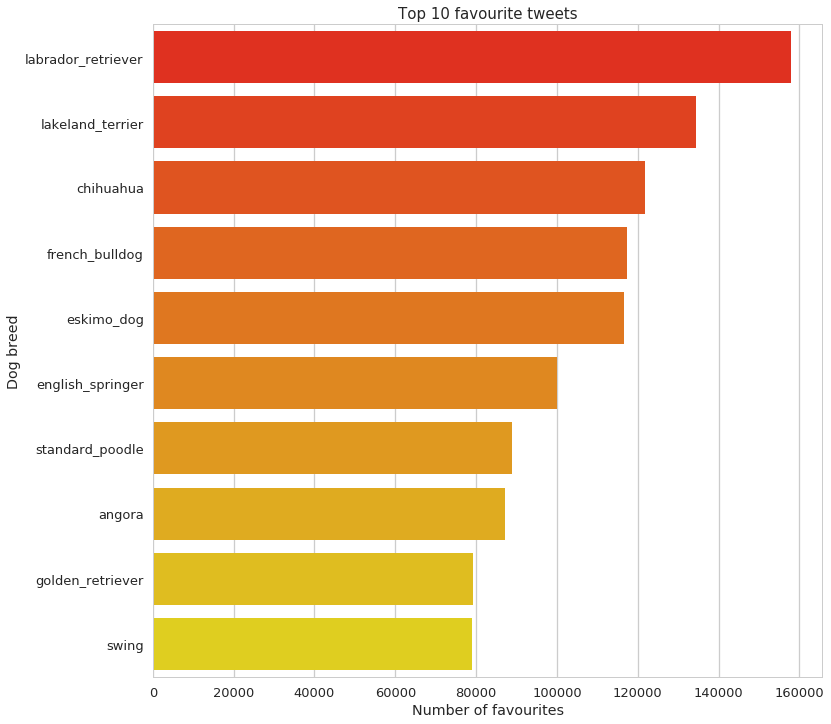

In [236]:
#Plotting a horizontal bar plot to visualize the data gathered above
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.color_palette("Blues")
ax=sns.barplot(x='favorite_count', y='p1', data=top10favourite,orient='h', palette="autumn")
ax.axes.set_title('Top 10 favourite tweets', fontsize=15)
ax.set(xlabel='Number of favourites', ylabel='Dog breed');

In [237]:
#Finding out the Pearson R correlation coefficient for the values in the favorite_count and rewtweet_count columns
df_corr = twitter_archive_master[['favorite_count','retweet_count']]
df_corr.corr(method='pearson')

,favorite_count,retweet_count
favorite_count,1.00000,0.92919
retweet_count,0.92919,1.00000


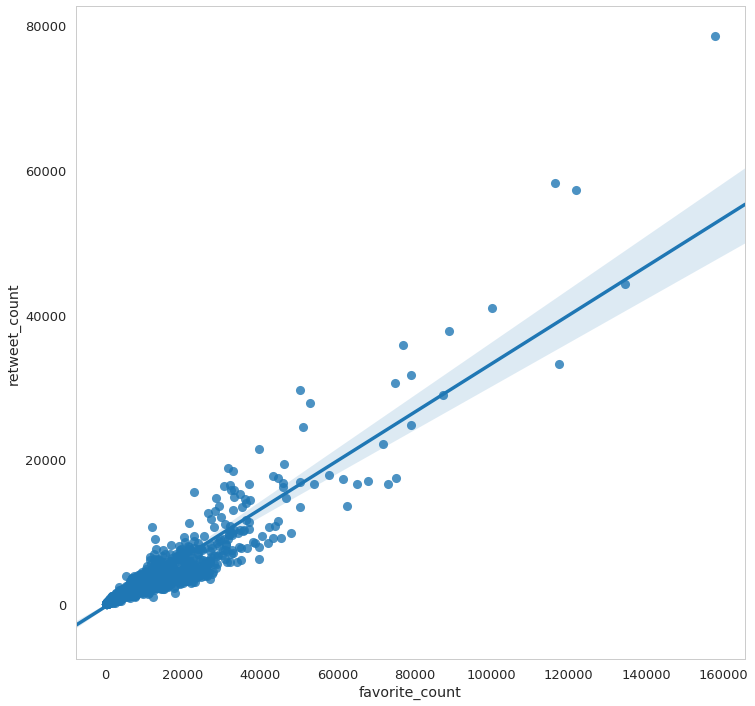

In [238]:
#Creating a scatter plot to better visualize the correlation between favorite_count and rewtweet_count values
plt.figure(figsize=(12,12))
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid(linestyle='')
sns.regplot(x='favorite_count',y='retweet_count', data = twitter_archive_master);

In [239]:
#Calculating the average for p1_conf values
twitter_archive_master.p1_conf.mean()

0.59392843869653766

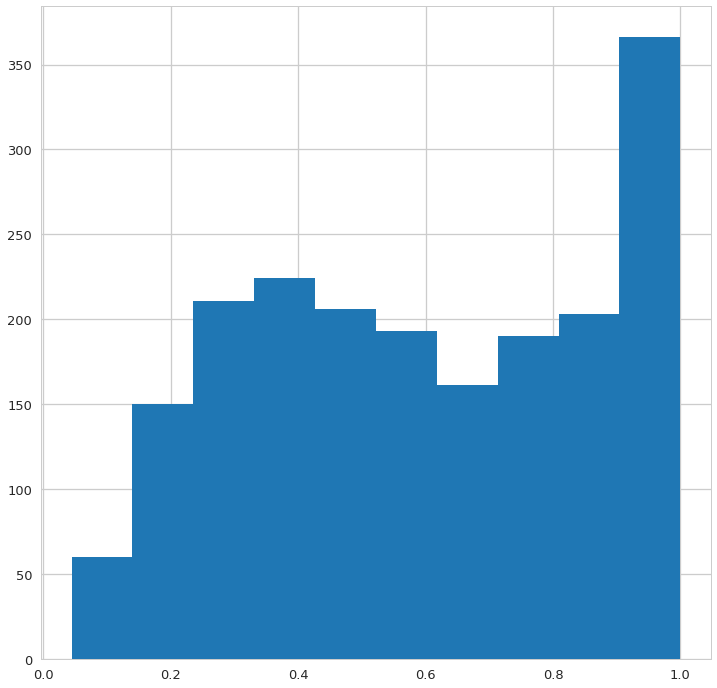

In [240]:
#Plotting the distribution of p1_conf values
plt.figure(figsize=(12,12))
plt.ticklabel_format(useOffset=False, style='plain')
plt.hist('p1_conf', data = twitter_archive_master);

In [241]:
#Changing the timezone to US central and creating an hour column 
twitter_timezone = twitter_archive_master[['tweet_id','timestamp']]
twitter_timezone['timestamp'] = twitter_timezone['timestamp'].dt.tz_localize('UTC').dt.tz_convert('US/Central')
twitter_timezone['time_hour'] = twitter_timezone['timestamp'].dt.hour
twitter_hours_1 = twitter_timezone.groupby('time_hour')['tweet_id'].count().reset_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


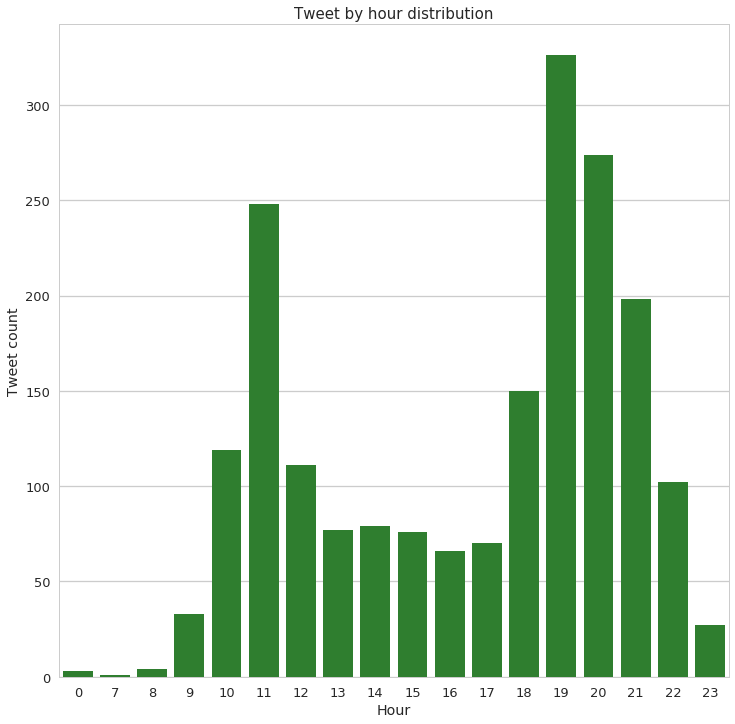

In [242]:
#Plotting visual for the hourly distribution of tweets
plt.figure(figsize=(12,12))
ax=sns.barplot(x='time_hour', y='tweet_id', data=twitter_hours_1, color='forestgreen')
ax.axes.set_title('Tweet by hour distribution', fontsize=15)
ax.set(xlabel='Hour', ylabel='Tweet count');

<a id='conclusions'></a>
## Conclusions

>As per the analysis process presented above, we have managed to extract the information we needed to succesfully answer the questions posed at the start of the visulaization part. Answers are summarized below

### 1. Which are the top 10 tweets based on the number of favourites counts? and 2. What are the dog breeds associated with the top 10 tweets mentioned above?

>1. 744234799360020481 - labrador retriever (157842 favourites)
>2. 822872901745569793 - lakeland_terrier (134504 favourites)
>3. 807106840509214720 - chihuahua (121854 favourites)
>4. 866450705531457537 - french_bulldog	(117429 favourites)
>5. 739238157791694849 - eskimo_dog (116547 favourites)
>6. 879415818425184262 - english_springer (100118 favourites)
>7. 819004803107983360 - standard_poodle (88954 favourites)
>8. 859196978902773760 - angora	(87287 favourites)
>9. 870374049280663552 - golden_retriever(79141 favourites)
>10. 678399652199309312 - bedlington_terrier(79080 favourites), based on the 2nd prediction of the neural network


### 3. What type of correlation can we observe between `favourite_ count` and `retweet_count` values?

>As per the table and visualization included, we can observe that a very strong positive correlation exists between the the number of retweets and the number of favourites a tweet gets, with the Pearson r coeffiecient being equal to 0.92. 

### 4. What is the average score of the `p1_conf` coeffiecient? How are the confidence scores distributed?

>The average score of the p1_conf coefficient is 0.59. As per the visualization of the distribution of values of p1_conf we can observe that most of the values fall within the 0.4 and 0.8 range. 

### 5. What hours are the most popular for tweets to be tweeted at?

>Based on the initial timestamps included, the data suggested that the most popular hours for tweets to be tweeted were 1 and 2 AM. As the timestamp values were taken in with a UTC timezone, we have changed these to a US central timezone, assuming that the owner of the WeRateDogs Twitter account lives in the US. Based on this assumption, the most popular time range for tweeting is 7-10 PM, with a total of 800 tweets for this timeframe or 40.7% of total tweets included in the twitter_archive_master dataset.

## Limitations

>Due to the requirement of having a complete dataset with values for each column based on the union of the 3 datasets collected and the required removal of retweets and replies, we have disposed of partial data from each dataset, with the initial datsets having the following values: `df_image` (2075), `df_api` (2331), `df_archive` (2356). The final `twitter_twitter_archive dataset` has 1964 entries.
